# COGS 118A - Final Project


## Group members

- Simon Zheng
- Albert Henderson
- Zhengyuan Zhou
- Abhinav Chandra
- Sung Cho

# Abstract 
The goal of this project is to develop a machine-learning algorithm that can accurately classify stars into galaxies, quasars, and stars. The dataset used is the Sloan Digital Sky Survey (SDSS), and it contains observations of stars including 17 feature columns and 1 class column. We will preprocess the data by cleaning and extracting useful features before training a machine learning algorithm, specifically the K-nearest neighbors method(KNN), to classify the stars. The primary measure of success will be accuracy in correctly classifying the stars, which can be described as the total number of correct classifications over the total number of observations. We believe that through this project, we can develop a way to classify stars more accurately and more efficiently, thus enhancing our understanding of the universe and even possibly narrowing the range of habitable planets.


# Background

Kepler-438b is a rocky planet discovered in 2015 that is located 640 light-years from Earth in the constellation Lyra, with a mass of 1.46 Earths<a name="NASA"></a>[<sup>[1]</sup>](#NASA). What makes it special is that Kepler-438b locates right on the habitable zone of its parent star (0.166 AU), making the temperature just right for water to exist in a liquid state<a name="Torres"></a>[<sup>[2]</sup>](#Torres). This means that if one day humans have to migrate to another planet, Kepler-438b becomes a potential second earth, and this finding can also indicate that life might exist on Kepler-438b. 

Other than Kepler-438b, scientists have found 11 more small Kepler transiting planets located in the habitable zone, and using techniques such as big data analysis and supervised machine learning, we could possibly find more habitable planets with higher efficiency compared to traditional methods of stellar classification. Bailer-Jones, for instance, pointed out in their paper that “current and future large astronomical surveys will yield multiparameter databases on millions or even billions of objects”<a name="Bailer-Jones"></a>[<sup>[3]</sup>](#Bailer-Jones), which is why it becomes necessary to let computers do the work instead of manually classifying and labeling all the stars. They also discussed how the technique of unsupervised machine learning does not work well, because it produces “natural groupings” instead of groupings based on definitions provided by astrologists. 

Similarly, Baqui also acknowledged the challenges presented with large datasets and successfully implemented machine learning algorithms such as K-nearest neighbors, decision trees, random forest (RF), and artificial neural networks to train and classify stars<a name="Baqui"></a>[<sup>[4]</sup>](#Baqui). The major approach used by Banqui was the K-nearest neighbor method, where given a new data point (star), this algorithm calculates the distance between that data point and all of the training instances and selects the k instances with the shortest distance. These k instances are then used to determine the class of the new star based on a majority vote. To further extend Banqui’s work, we plan to use the method of k-fold cross-validation learned in class to verify the accuracy of our trained models based on KNN based on the evaluation metrics to produce better predictions.

With these previous successful works, we believe that we can create a better model for classifying galaxies, quasars, and stars using features such as ascension, declination, or filters of the photometric system using supervised machine learning algorithms<a name="Saifuddin"></a>[<sup>[5]</sup>](#Saifuddin). Though challenges such as outlier detection and handling sparse datasets commonly exist for the task of stellar classification<a name="Shrinivas"></a>[<sup>[6]</sup>](#Shrinivas), we will do our best to address these problems.


# Problem Statement

The vast universe has always fascinated us, and we have been exploring the stars and galaxies for centuries. What if we could develop a machine learning model that could accurately classify astronomical objects based on their spectral characteristics? Our goal is to build a state-of-the-art model that can accurately classify stars, galaxies, and quasars using the SDSS dataset. With 17 feature columns and 1 class column, we have a treasure trove of information waiting to be unlocked. Imagine being able to predict the class of an astronomical object with high accuracy, opening up a new era of space exploration and discovery. This is a multi-class classification problem as this dataset has 3 different target classes which need to be predicted.


To achieve the highest accuracy possible, we plan to explore several advanced techniques, including deep learning and ensemble models, by stacking Logistic Regression, Support Vector Classifier, K Neighbors Classifier, and Decision Tree Classifier with their best parameters. Specifically, we plan to explore Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) for the deep learning models, and Random Forest and Gradient Boosting for the ensemble models. We will also compare these models with the K-Nearest Neighbors (KNN) model we previously proposed. 


As for the current state-of-the-art benchmark for this task, a recent study by Zhang et al. (2021) achieved an accuracy of 99.64% using a deep learning model with a novel loss function called the triplet entropy loss. We will use this as our benchmark and aim to achieve similar or better results.


We plan to measure the accuracy of our models using precision, recall, F1 score, and the confusion matrix, and we will use techniques such as cross-validation and hyperparameter tuning to fine-tune our models. Through rigorous testing and evaluation, we aim to build a state-of-the-art model that can accurately classify astronomical objects, opening up new possibilities for space exploration and discovery.

# Data

The dataset that we are planning to work with is the 17th data release of the Sloan Digital Sky Survey, and it can be found [here](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17). This data was collected to perform a stellar classification task and it contains 100000 observations. Each observation contains 17 feature variables that describe various aspects of the observation and 1 class variable that labels the class of the observation as either a galaxy, star, or quasar object. 

Of the 17 features that each observation has, 5 of these features are used for identification of the observation (obj_id, run_id, rerun_id, field_id, spec_obj_id) and 4 other features are used to describe different aspects about how the data was captured.(cam_col, plate, MJD, fiber_ID). The features used for identification help researchers keep track of each observation, which is an arduous task with 100000 observation. The features used to describe data collection are also critical for researchers to keep track of as they detail the circumstances that led to the recording of each observation. However, for a machine learning classification task, this data is not of utmost importance. The remaining 8 variables are all crucial to classifying the celestial body. These variables are:

- alpha: Right ascension angle at J200 epoch
- delta: Declination angle at J200 epoch
- u: ultraviolet filter in the photometric system
- g: green filter in the photometric system
- r: red filter in the photometric system
- i: near infrared filter in the photometric system
- z: infrared filter in the photometric system
- redshift: redshift value based on the increase in wavelength

All of these variables hold continuous floating point values, so they will be normalized using z-scores. The class feature that labels the observation is a categorical feature, and this will be one hot encoded. 

As far as cleaning this dataset, the features used for identification and to describe data collection will likely be dropped. The obj_id field may be kept to ensure there is one identification field. This would result in the dataset being cut down to 10 variables in total, with 8 feature variables, 1 identification variable, and 1 class variable. Also, using all 100000 observations may prove to be too much of a computational burden to work with, in which case we would randomly sample a smaller subset of the larger dataset and work with that to build our classifier.

# Proposed Solution

Our primary goal is to find the best classifier for the given dataset. To achieve this, we will compare the performance of several classification models and ensemble them using a stacking approach. The models we will consider are Logistic Regression, Support Vector Classifier, Decision Tree Classifier, and K-nearest neighbors (KNN) model.


We will start by preprocessing the data, which includes normalizing the feature columns and converting the class column into categorical labels. We will then use cross-validation to split the dataset into training and testing sets, ensuring that the data is well-distributed across both sets.


For each model, we will perform a grid search to find the best hyperparameters. For the KNN model, we will choose the number of neighbors (k) based on the performance on the validation set. We will use a distance metric, such as Euclidean or Manhattan, to calculate the distance between data points. We will train the KNN model using the training set and evaluate its performance on the testing set. We will use accuracy as the primary metric to evaluate the performance of the KNN model. We will also report the precision, recall, and F1 score to assess the model's performance in each class.


For the Logistic Regression model, we will search for the best regularization parameter and penalty. For the Support Vector Classifier, we will search for the best C and kernel function. For the Decision Tree Classifier, we will search for the best maximum depth, minimum samples split, and minimum samples leaf. For the K Neighbors Classifier, we will search for the best number of neighbors, metric, and algorithm.


Once we have obtained the best hyperparameters for each model, we will ensemble them using stacking. We will use the predicted probabilities of each model as input features to train a meta-classifier, which will make the final prediction. We will evaluate the performance of the stacked model using the same metrics as for the individual models.


By comparing the performance of the different models, we aim to find the best classifier for the given dataset. We will also report the state-of-the-art performance of the best classifier in the literature as a benchmark for our results.


# Evaluation Metrics

Accuracy is the primary metric we will use to quantify performance. Accuracy is a measure of the proportion of observations that were classified correctly. In the case of a binary classification, it could be represented like this:
$$Accuracy = \frac{True Positives + True Negatives}{Total No. of Observations}$$
However, our classifier is working with multiple classes, so calculating accuracy for our classifier would be to alter the equation to:
$$Accuracy = \frac{Total No. of Correct Classifications}{Total No. of Observations}$$
For example, if our model is being tested on 100 observations, and 26 were correctly classified as stars, 28 were correctly classified as galaxies, and 36 were correctly classified as quasar objects, the accuracy would be 0.80. Accuracy is a good measure for this task since our main goal is to classify as many observations correctly as possible.

The F1 score, precision, and recall would also be a useful to help gain a better insight on specific aspects of model performance. These metrics can be calculated by:

$$precision = \frac{True Positives}{True Positive + False Positives}$$

$$recall = \frac{True Positives}{True Positives + False Negatives}$$

$$F1 = \frac{2(precison)(recall)}{precision + recall}$$

Precision gives us the proportion of objects that have been correctly classified with respect to all the objects that have been classified in that class. Recall gives us what proportion of a certain class has been correctly classified. F1 score gives us a harmonic mean of precision and recall. Because this is a multi class classifier, this metrics can be measured for each class. For example, out of a 100 objects labelled as galaxies by our classifier, if 93 are actually galaxies, precision is 0.93. Similarly, for 100 actual galaxies, if 88 are correctly classified as galaxies, recall is 0.88. The F1 score would then be 0.90.

# Results

### Preparation

__Importing Packages__

In [110]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from matplotlib import pyplot as plt
from matplotlib import style
style.use(style='seaborn-deep')
from tabulate import tabulate
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

__Basic information of the dataset__

In [2]:
data_df = pd.read_csv("star_classification.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [3]:
data_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


__Find out all the classes that we are goint to classify as__

In [4]:
labels = data_df['class'].unique()
print(labels)

['GALAXY' 'QSO' 'STAR']


### Data Cleaning

__Check if there are null values in the dataset, if yes, then remove them__

In [5]:
display(data_df.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

It turned out that the dataset has no null values and is good to use.

__Now, we should select all the important features we want to build our models__

The ID fields are not helpful features for classification. Neither are the `cam_col`, `plate`, or `MJD` features, since these are used to store information about data collection. Therefore, these can be dropped.

In [6]:
data_df = data_df.drop(columns = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'])
data_df.head()

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


### Data Brief View & Visualization

__We can start with an exploratory data analysis__

In [7]:
data_df.describe()

,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


__The graphs below portray the difference in the amount of observations of each class in the dataset__

Text(0.5, 1.0, 'No. of observations per Class')

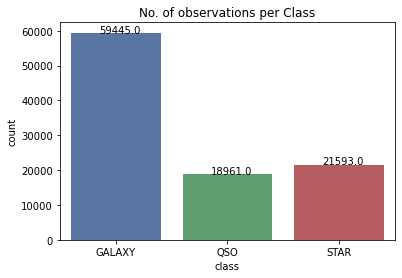

In [14]:
class_count = sns.countplot(data = data_df, x = 'class')
for p in class_count.patches:
    class_count.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('No. of observations per Class')

There are significantly more observations of galaxies than quasars or stars, and there are more observations of stars than quasars as well. This bias must be accounted for when setting up the classifiers.

__We can now take a look at the difference in distribution of each variable by class__

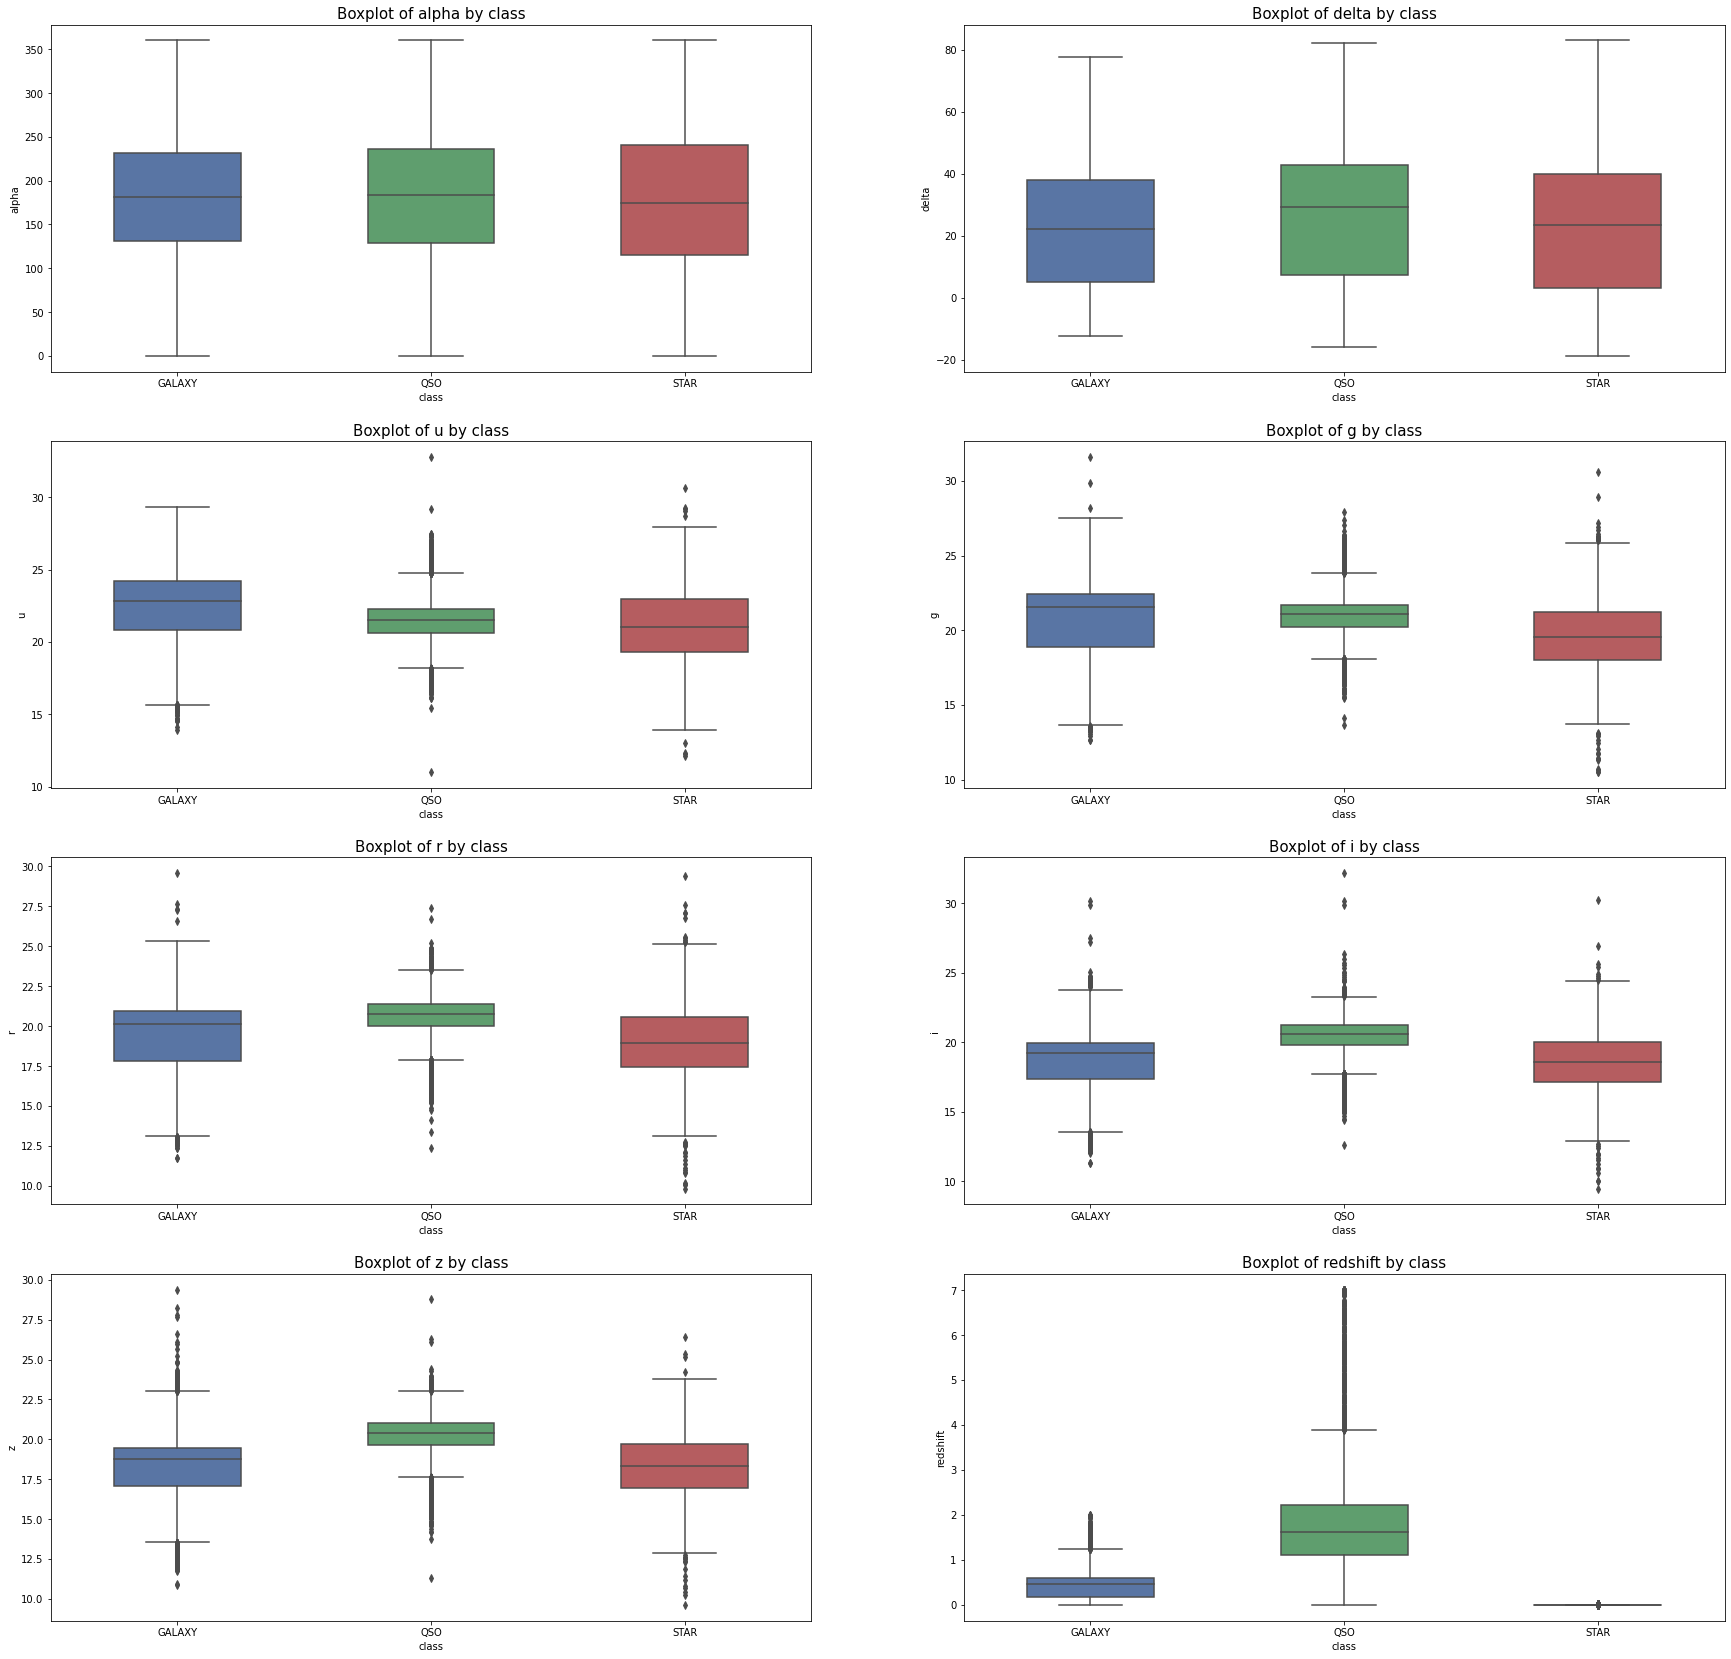

In [16]:
features = list(data_df.columns)
features.remove('class')

plt.figure(figsize = (30, 60))
for i, feature in zip(range(len(features)), features):
    plt.subplot(int('{}2{}'.format(len(features), i+1)))
    sns.boxplot(data = data_df, x = 'class', y = feature, width = 0.5)
    plt.title(label = 'Boxplot of {} by class'.format(feature), fontsize = 15)


There seems to be some outlier in the `u`, `g`, and `z` class according to the boxplots. The outlier appears to be in the star class, this is the minimum value in each of these features in the star class. The following is done to identify this outlier.

In [9]:
data_df[data_df['u'] == data_df[data_df['class'] == 'STAR']['u'].min()]

,alpha,delta,u,g,r,i,z,class,redshift
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,STAR,0.000089


In [10]:
data_df[data_df['g'] == data_df[data_df['class'] == 'STAR']['g'].min()]

,alpha,delta,u,g,r,i,z,class,redshift
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,STAR,0.000089


In [11]:
data_df[data_df['z'] == data_df[data_df['class'] == 'STAR']['z'].min()]

,alpha,delta,u,g,r,i,z,class,redshift
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,STAR,0.000089


It appears that the outlier in all three cases is the exact same observation, so it would be beneficial to drop it.

In [12]:
data_df = data_df.drop(index = [79543])
data_df.shape

(99999, 9)

__We can now take another look at the boxplots__

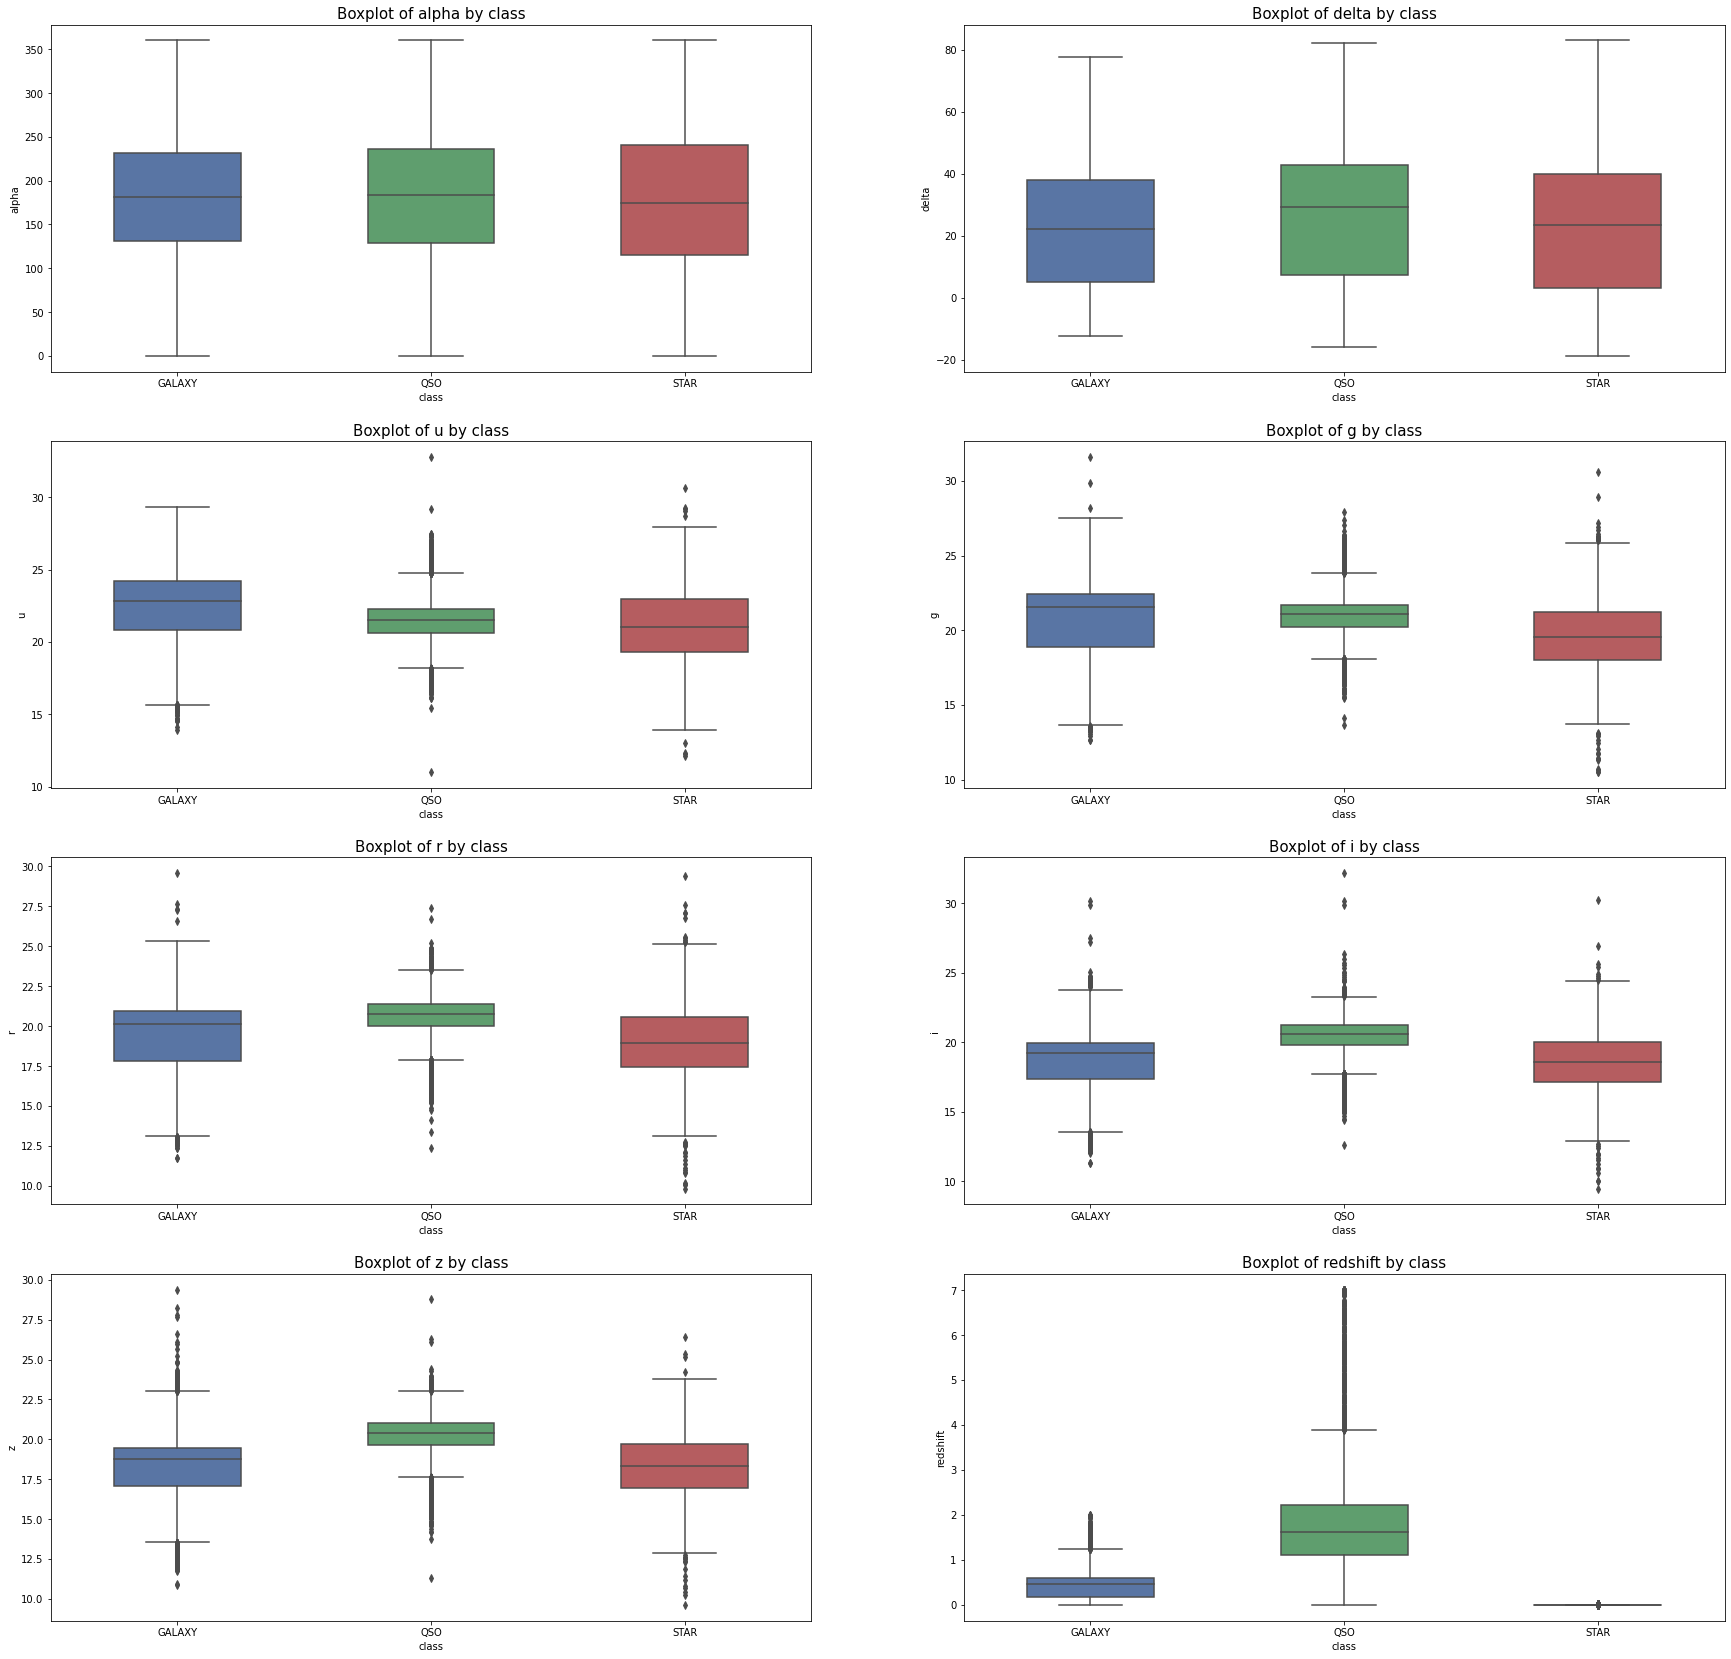

In [14]:
plt.figure(figsize = (30, 60))
for i, feature in zip(range(len(features)), features):
    plt.subplot(int('{}2{}'.format(len(features), i+1)))
    sns.boxplot(data = data_df, x = 'class', y = feature, width = 0.5)
    plt.title(label = 'Boxplot of {} by class'.format(feature), fontsize = 15)


There does not seem to be a big difference in the average `alpha` and `delta` values between the classes. However, the boxplots for the `u`, `g`, and `z` features provide much more helpful information now. It appears the features that create the biggest distinction are `redshift` and, to a lesser extent, the `z`, `r`, and `i` classes.

__A multivariate analysis could also help gain an understanding of how the features measure up against each other. The first step is to generate a pairplot to gain a big picture idea.__

Text(0.5, 1.0, 'Pairplot of All Features')

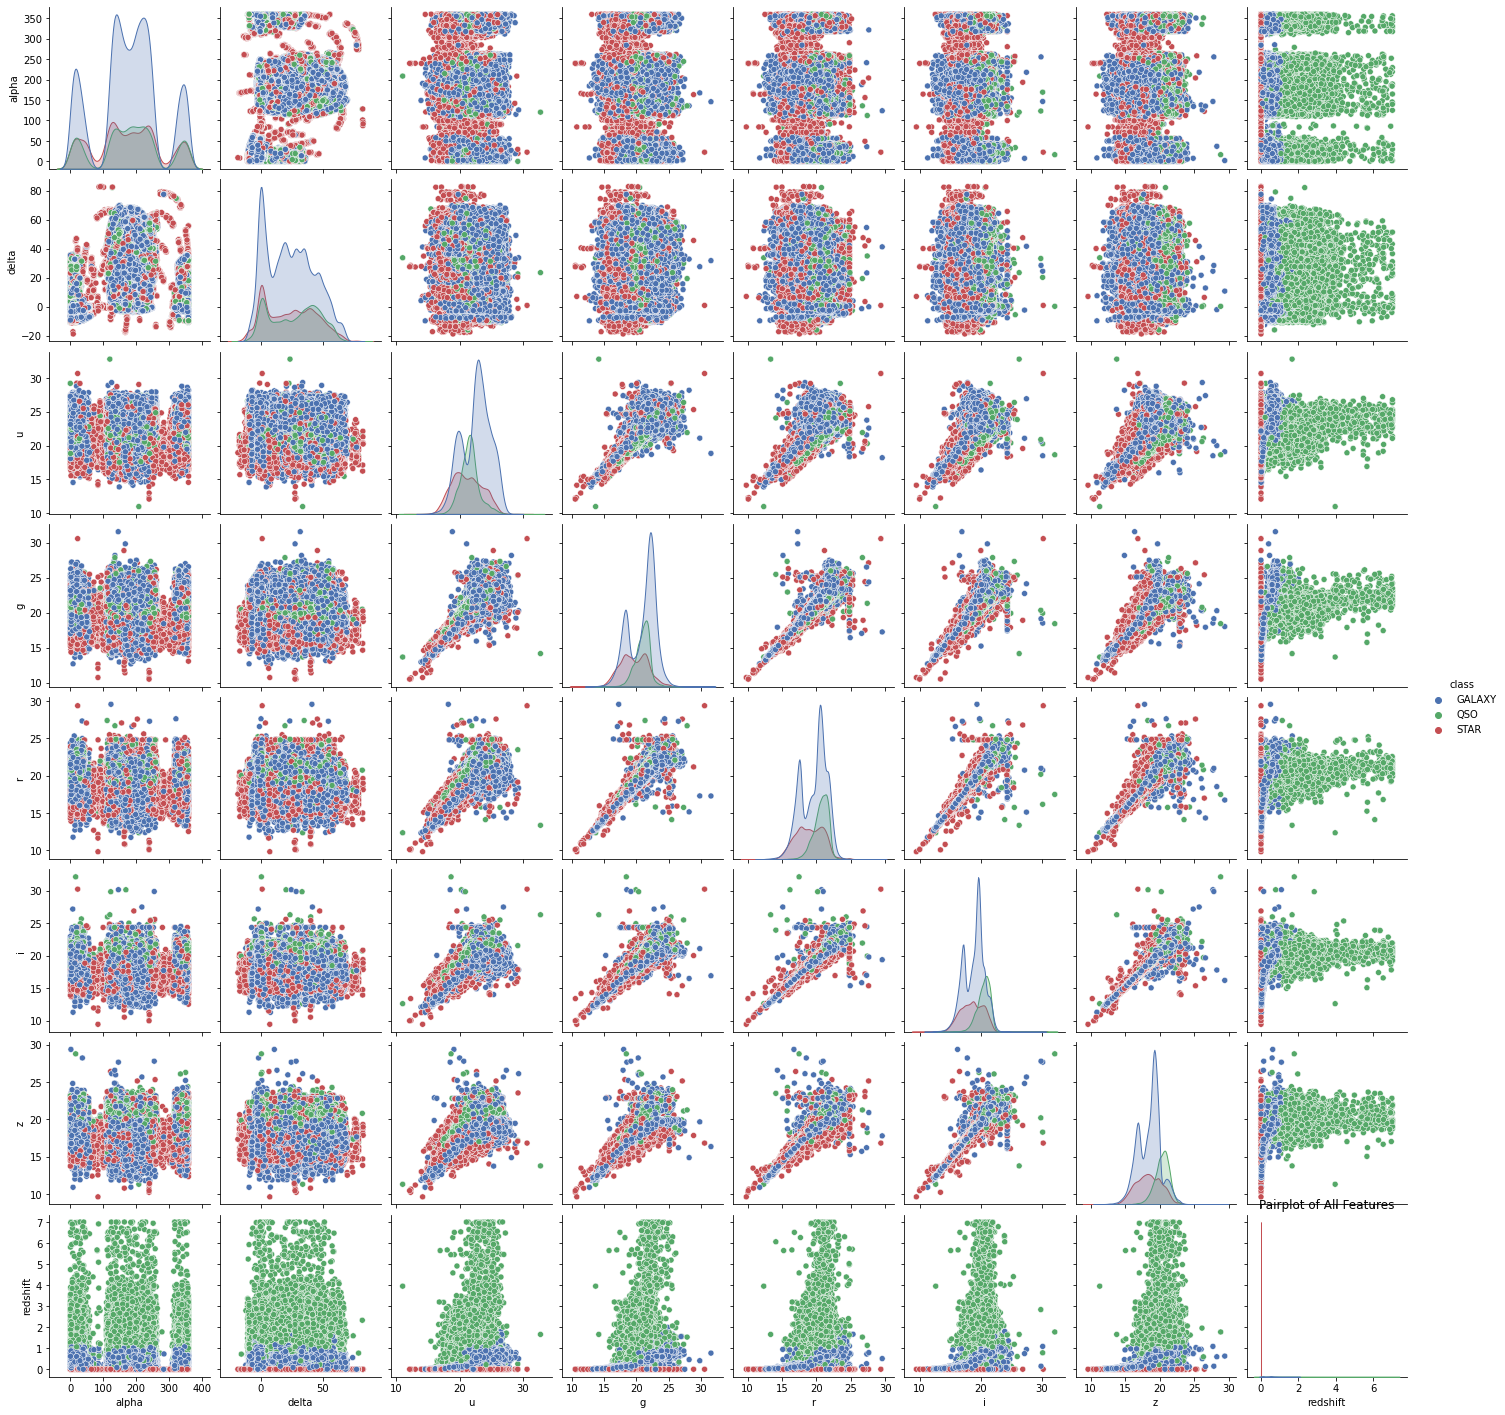

In [15]:
sns.pairplot(data = data_df, hue = 'class')
plt.title('Pairplot of All Features')

There is no clear correlation between `alpha`, `delta`, `redshift` and all other features. The density plot of `redshift` is also very interesting, as there's a sharp peak of the star class at 0, while the galaxy and quasar objects are distributed a lot more evenly. It reflects the boxplot of the `redshift` feature above. There does however seem to be a clear positive correlation among the `u`, `g`, `r`, `i`, and `z` features. 

__These correlations can be looked at more closely using a heatmap__

<AxesSubplot:>

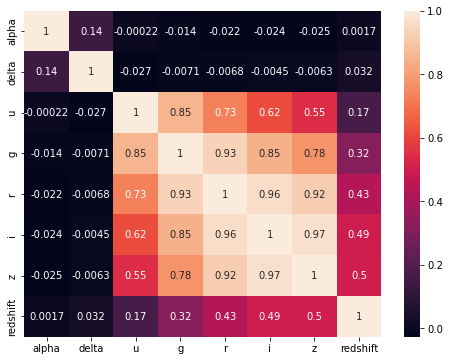

In [17]:
plt.figure(figsize = (8, 6))
sns.heatmap(data = data_df[features].corr(), annot = True)

### Data Processing

__We can now one-hot encode the class column__

In [19]:
data_df = pd.concat([data_df, pd.get_dummies(data_df['class'])], axis=1) # One hot encode three classes
data_df = data_df.drop('class', axis=1)

In [20]:
data_df

,alpha,delta,u,g,r,i,z,redshift,GALAXY,QSO,STAR
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,1,0,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,1,0,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,1,0,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,1,0,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,1,0,0
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,1,0,0
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,1,0,0
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,1,0,0


This only goes to prove that there is a strong correlation among the group of `u`, `g`, `r`, `i`, and `z` features. Amongst these, `r-g`, `i-r`, and `i-z` have especially strong correlations. 

__The data can now be split into training and test sets. This can be done using the train_test_split() method from the sklearn library, and the data will be split into an 80-20 train-test split__

In [91]:
X = data_df[features] # decision matrix
star_classes = ['GALAXY', 'QSO', 'STAR']
y = data_df[star_classes].values #labels

print("The shape of X is: {}".format(X.shape))
print("The shape of y is: {}".format(y.shape))

The shape of X is: (99999, 8)
The shape of y is: (99999, 3)


In [92]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y,test_size = 0.2, random_state = 42)

print("The shape of X.train is: {}".format(X_train.shape))
print("The shape of X.test is: {}".format(X_test.shape))
print("The shape of y.train is: {}".format(y_train.shape))
print("The shape of y.test is: {}".format(y_test.shape))

The shape of X.train is: (79999, 8)
The shape of X.test is: (20000, 8)
The shape of y.train is: (79999, 3)
The shape of y.test is: (20000, 3)


In [93]:
# Get data for Cross Validation
(X_train, X_cv, y_train, y_cv) = train_test_split(X_train, y_train,test_size = 0.2, random_state = 42)
print("The shape of X.train is: {}".format(X_train.shape))
print("The shape of X.test is: {}".format(X_test.shape))
print("The shape of X.cv is: {}".format(X_cv.shape))
print("The shape of y.train is: {}".format(y_train.shape))
print("The shape of y.test is: {}".format(y_test.shape))
print("The shape of y.cv is: {}".format(y_cv.shape))

The shape of X.train is: (63999, 8)
The shape of X.test is: (20000, 8)
The shape of X.cv is: (16000, 8)
The shape of y.train is: (63999, 3)
The shape of y.test is: (20000, 3)
The shape of y.cv is: (16000, 3)


__Data Normalization__

In [68]:
# Normalizing the data to see if it will help the performance of the ML model
scaling = MinMaxScaler()
X_train_norm = scaling.fit_transform(X=X_train)
X_cv_norm = scaling.transform(X=X_cv)
X_test_norm = scaling.transform(X=X_test)

### Models

__Logistic Regression__

In [94]:
# Turn one hot encode to 1d array
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [95]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [96]:
y_pred = model.predict(X_test)

Accuracy: 0.8772


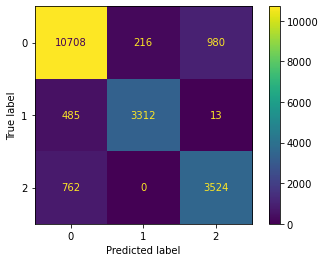

              precision    recall  f1-score   support

      GALAXY       0.90      0.90      0.90     11904
         QSO       0.94      0.87      0.90      3810
        STAR       0.78      0.82      0.80      4286

    accuracy                           0.88     20000
   macro avg       0.87      0.86      0.87     20000
weighted avg       0.88      0.88      0.88     20000



In [99]:
target_names = ['GALAXY', 'QSO', 'STAR']
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred, target_names=target_names))

Let's try the normalized data to train our model.

Accuracy: 0.92775


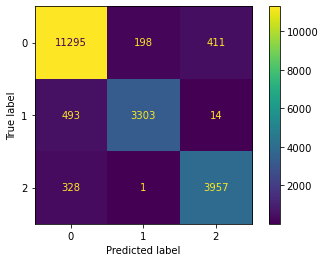

              precision    recall  f1-score   support

      GALAXY       0.93      0.95      0.94     11904
         QSO       0.94      0.87      0.90      3810
        STAR       0.90      0.92      0.91      4286

    accuracy                           0.93     20000
   macro avg       0.93      0.91      0.92     20000
weighted avg       0.93      0.93      0.93     20000



In [100]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred, target_names=target_names))

__Support Vector Machines__

The regular SVM-training with nonlinear-kernels, which is default in sklearn's SVC, is complexity-wise approximately: O(n_samples^2 * n_features), which is extremely slow for our dataset. From the visualization, we decided to use the LinearSVC for a better performance in running time with almost the same accuracy.

In [101]:
model_2 = LinearSVC()
model_2.fit(X_train, y_train)

LinearSVC()

In [102]:
svm_y_pred = model_2.predict(X_test)

Accuracy: 0.9143


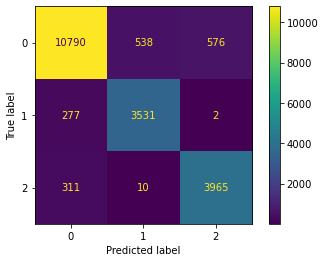

              precision    recall  f1-score   support

      GALAXY       0.95      0.91      0.93     11904
         QSO       0.87      0.93      0.90      3810
        STAR       0.87      0.93      0.90      4286

    accuracy                           0.91     20000
   macro avg       0.90      0.92      0.91     20000
weighted avg       0.92      0.91      0.91     20000



In [103]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", svm_accuracy)
cm = confusion_matrix(y_test,svm_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, svm_y_pred, target_names=target_names))

Like we did in Logistic Regression model, we are going to do with normalized data again.

Accuracy: 0.91245


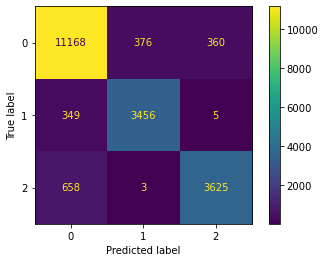

              precision    recall  f1-score   support

      GALAXY       0.92      0.94      0.93     11904
         QSO       0.90      0.91      0.90      3810
        STAR       0.91      0.85      0.88      4286

    accuracy                           0.91     20000
   macro avg       0.91      0.90      0.90     20000
weighted avg       0.91      0.91      0.91     20000



In [104]:
model_2 = LinearSVC()
model_2.fit(X_train_norm, y_train)
svm_y_pred = model_2.predict(X_test_norm)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", svm_accuracy)
cm = confusion_matrix(y_test,svm_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, svm_y_pred, target_names=target_names))

### Model Selection

__Cross Validation__

In [84]:
y_1d = np.argmax(y,axis=1);
X_norm = scaling.fit_transform(X=X)
scores = cross_val_score(model, X, y_1d, cv=5)
print("Cross validation for Logistic Regression:",scores)
scores = cross_val_score(model, X_norm, y_1d, cv=5)
print("Cross validation for Logistic Regression with normalization:",scores)
scores = cross_val_score(model_2, X_norm, y_1d, cv=5)
print("Cross validation for SVC:",scores)
scores = cross_val_score(model_2, X_norm, y_1d, cv=5)
print("Cross validation for SVC with normalization:",scores)


Cross validation for Logistic Regression: [0.86565    0.89005    0.88085    0.8711     0.88424421]
Cross validation for Logistic Regression with normalization: [0.9282     0.93025    0.93575    0.9375     0.92719636]
Cross validation for SVC: [0.9122     0.9171     0.9188     0.91385    0.91434572]
Cross validation for SVC with normalization: [0.9122     0.9171     0.9188     0.91385    0.91434572]


# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

The "Stellar Classification" project aims to use a dataset found on Kaggle to develop a machine learning model that can accurately classify celestial objects as galaxies, stars, or quasars. Like any project that deals with data and technology, there are several ethical and privacy considerations that need to be taken into account to ensure that the project is conducted responsibly and without causing harm to any individuals or groups.

Since the dataset used in the project was obtained through observations from the Sloan Digital Sky Survey, it is important to carefully analyze the dataset to detect and address any potential biases that may exist in the data.

The machine learning model should be designed in a way that is fair to all groups, without discriminating against any specific demographic. The model does not unfairly benefit one group over another, and that it is not used to discriminate against individuals or groups since it is merely a study of stellar objects.

The machine learning model should be transparent and explainable, meaning that it is possible to understand how it works and how it makes classification decisions to prevent the model from being used in inappropriate ways.

Personal information does not exist in the dataset to prevent the identification of individuals and protect privacy.

In terms of data security, the datasets is published online transparently, so there is no potential problems such as unauthorized access, modification, or disclosure of the data.

Individuals included in the dataset should be informed about how their data will be used and provided with the option to opt-out of having their data used in the project. Informed consent is critical to protecting the privacy of individuals and to ensuring that the project is conducted ethically. Since the dataset is officially published by Sloan Digital Sky Survey, it should be considered that everyone already given consent of the usage of this public dataset presumably.

In conclusion, the project will be conducted with a strong emphasis on ethics and privacy to ensure that it is conducted responsibly and does not cause harm to individuals or groups. The project should be designed to be fair and transparent, with appropriate measures taken to protect the privacy of individuals included in the dataset. By taking these steps, the project can be conducted in an ethical and responsible manner, while still achieving its scientific objectives.
### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="NASA"></a>1.[^](#NASA): NASA. (n.d.). Exoplanet-catalog – exoplanet exploration: Planets beyond our solar system. NASA. Retrieved February 22, 2023, from https://exoplanets.nasa.gov/exoplanet-catalog/5269/kepler-438-b/ 

<a name="Torres"></a>2.[^](#Torres): Torres, G., Kipping, D. M., Fressin, F., Caldwell, D. A., Twicken, J. D., Ballard, S., ... & Quintana, E. V. (2015). Validation of 12 small Kepler transiting planets in the habitable zone. The Astrophysical Journal, 800(2), 99.

<a name="Bailer-Jones"></a>3.[^](#Bailer-Jones): Bailer-Jones, C. A. (2001). Automated stellar classification for large surveys: a review of methods and results. arXiv preprint astro-ph/0102223.

<a name="Baqui"></a>4.[^](#Baqui): Baqui, P. O., Marra, V., Casarini, L., Angulo, R., Diaz-Garcia, L. A., Hernández-Monteagudo, C., ... & Taylor, K. (2021). The miniJPAS survey: star-galaxy classification using machine learning. Astronomy & Astrophysics, 645, A87. 

<a name="Saifuddin"></a>5.[^](#Saifuddin): Saifuddin, M. (2023, January 3). Stellar classification: A machine learning approach. Medium. Retrieved February 22, 2023, from https://towardsdatascience.com/stellar-classification-a-machine-learning-approach-5e23eb5cadb1 

<a name="Shrinivas"></a>6.[^](#Shrinivas): Shrinivas Kulkarni's webpage. (n.d.). Retrieved February 22, 2023, from https://sites.astro.caltech.edu/~srk/ 
